In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammaincc
from scipy.stats import lognorm

Limits with uncertain background an efficiencies <br>
The model is $N=\alpha S + \beta B$ <br>
$\alpha$ and $\beta$ have lognormal pdfs of mean 1 and unc. $\delta\alpha$ and $\delta\beta$

In [2]:
# Here are counts and backgrounds and uncertainties
N = [0,     2,    0,   2,   0, 2]
B = [0.5, 0.5,  2.0, 2.0, 3.5, 3.5]
dalpha = 0.2
dbeta  = 0.4
Ntoys  = 10000

To calculate the frequentist limit use result
$\sum_{n=0}^N \frac{\mu^n e^{-\mu}}{N!} = \frac{1}{N!}\Gamma(N+1, \mu)$ <br> 
where $\Gamma(a,b) = \int_b^{\infty} t^{a-1}e^{-t} dt$

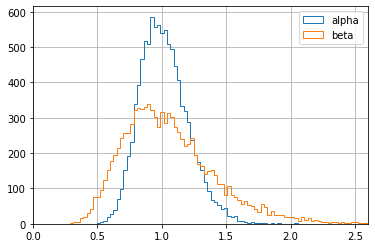

In [3]:
# pick alphas and beta, make sure that lognormal picks make sense
np.random.seed(12345)
alpha = np.random.lognormal(0, np.log(1+dalpha), Ntoys)
beta  = np.random.lognormal(0, np.log(1+dbeta), Ntoys)
ax    = plt.subplot(111)
bins  = np.linspace(max(0,1-4*max(dalpha,dbeta)), 1+4*max(dalpha,dbeta), 101)
ax.hist(alpha, bins, label='alpha', histtype='step')
ax.hist(beta,  bins, label='beta',  histtype='step')
ax.grid()
ax.set_xlim(bins[0],bins[-1])
ax.legend()

In [4]:
for n,b in zip(N,B):

    print("N =",n, "B =",b, "dalpha =", dalpha, "dbeta =", dbeta)
    # Start with S=0 and increase it in steps.
    # For each S:
    #   Find average p-value for different alpha,beta
    #   stop once we reach the 0.05
    # Note: we start at S=0 to avoid numerical issues 
    #       since the 2nd parameter of gammaincc must be >-0 
    s    = 0
    ds   = 0.01
    pav  = 999.
    while pav > 0.05:
        temp = gammaincc(n+1, alpha*s+beta*b)
        pav  = np.average(temp)
        s = s + ds
    print('Frequentist                  limit = ', round(s,1))
    
    # CL_S now
    s    = 0
    ds   = 0.01
    pav  = 999.
    while pav > 0.05:
        temp = gammaincc(n+1, alpha*s+beta*b)/gammaincc(n+1, beta*b)
        pav  = np.average(temp)
        s = s + ds
    print('CLs                          limit = ', round(s,1))
    
    # Bayesian.  MC integration.  Flat prior.
    # (50 is about infty for our purposes)
    sarray    = np.linspace(0,50,5000)
    integrand = np.zeros( len(sarray) )
    for d1,d2 in zip(alpha,beta):
        sPlusB    = d1*sarray + d2*b
        integrand = integrand + np.power(sPlusB, n) * np.exp(-sPlusB) 
    totalIntegral = integrand.sum()  # up to factor ds
    integral      = np.cumsum(integrand) / totalIntegral
    index         = (integral>0.95).argmax()  # index of limit
    s             = sarray[index]
    print('Bayesian flat prior          limit = ', round(s,1))
  
    # Bayesian.  MC integration. 1/sqrt(s) prior
    # (50 is about infty for our purposes)
    sarray    = np.linspace(0.0001,50,5000)
    integrand = np.zeros( len(sarray) )
    for d1,d2 in zip(alpha,beta):
        sPlusB    = d1*sarray + d2*b
        integrand = integrand + np.power(sPlusB, n) * np.exp(-sPlusB)/np.sqrt(sarray) 
    totalIntegral = integrand.sum()  # up to factor ds
    integral      = np.cumsum(integrand) / totalIntegral
    index         = (integral>0.95).argmax()  # index of limit
    s             = sarray[index]
    print('Bayesian 1/sqrt(s) prior     limit = ', round(s,1))

    print(' ')

N = 0 B = 0.5 dalpha = 0.2 dbeta = 0.4
Frequentist                  limit =  2.6
CLs                          limit =  3.1
Bayesian flat prior          limit =  3.2
Bayesian 1/sqrt(s) prior     limit =  1.7
 
N = 2 B = 0.5 dalpha = 0.2 dbeta = 0.4
Frequentist                  limit =  6.1
CLs                          limit =  6.1
Bayesian flat prior          limit =  6.3
Bayesian 1/sqrt(s) prior     limit =  5.0
 
N = 0 B = 2.0 dalpha = 0.2 dbeta = 0.4
Frequentist                  limit =  1.1
CLs                          limit =  3.1
Bayesian flat prior          limit =  3.2
Bayesian 1/sqrt(s) prior     limit =  1.7
 
N = 2 B = 2.0 dalpha = 0.2 dbeta = 0.4
Frequentist                  limit =  4.5
CLs                          limit =  5.1
Bayesian flat prior          limit =  5.3
Bayesian 1/sqrt(s) prior     limit =  3.5
 
N = 0 B = 3.5 dalpha = 0.2 dbeta = 0.4
Frequentist                  limit =  0.0
CLs                          limit =  3.1
Bayesian flat prior          limit =  3.2